System to solve:
0: x^5 + y^5 -y^2
1: y^3 + x^5*y + x + 1


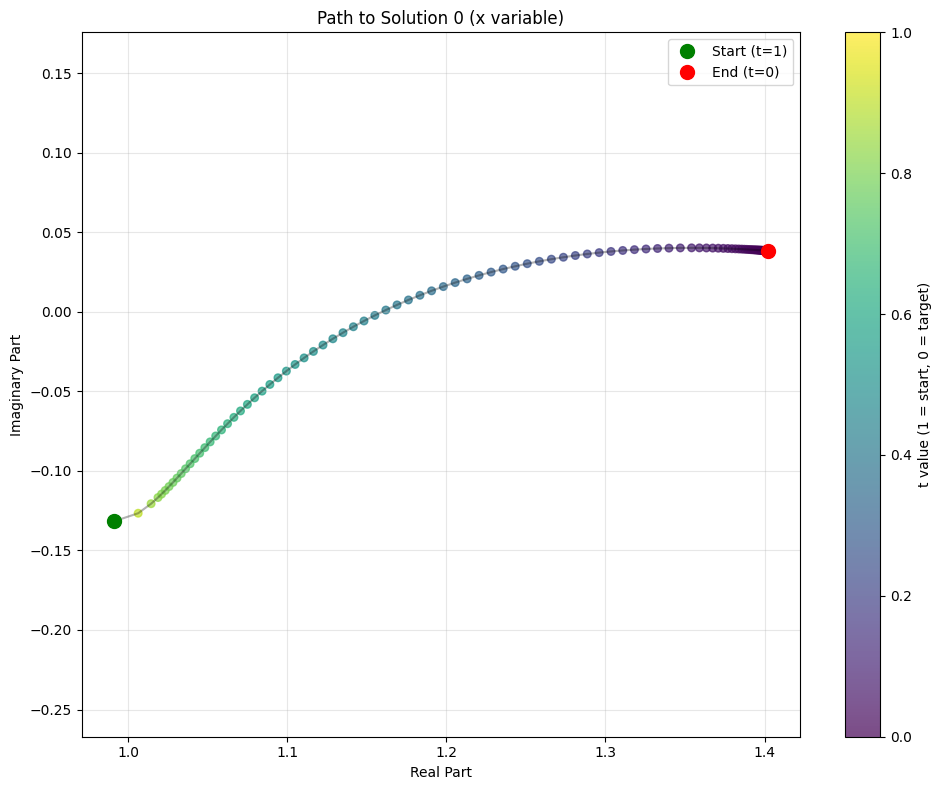


Found 30 solutions:

Solution 1:
Solution (regular, residual=5.54e-14):
  x = 1.0092398 + 0.7913573j
  y = 1.4019684 + 0.038367584j

Solution 2:
Solution (regular, residual=6.52e-14):
  x = -0.46531168 + 1.099522j
  y = 1.3263758 + 0.079722262j

Solution 3:
Solution (regular, residual=5.84e-12):
  x = -1.0840893
  y = 1.250833

Solution 4:
Solution (regular, residual=3.70e-15):
  x = -0.58335571 + -0.70545554j
  y = 0.52577021 + 0.48428303j

Solution 5:
Solution (regular, residual=1.63e-13):
  x = -0.46531168 + -1.099522j
  y = 1.3263758 + -0.079722262j

Solution 6:
Solution (regular, residual=9.52e-14):
  x = 1.0092398 + -0.7913573j
  y = 1.4019684 + -0.038367584j

Solution 7:
Solution (regular, residual=6.00e-12):
  x = 0.96063945 + 0.47572731j
  y = 0.40227411 + 0.80972456j

Solution 8:
Solution (regular, residual=4.26e-14):
  x = -0.24645994 + 0.94666642j
  y = 0.21433572 + 0.76720542j

Solution 9:
Solution (regular, residual=6.04e-15):
  x = -0.76476312 + 0.11139204j
  y = 0.1864

In [2]:
from pycontinuum import polyvar, PolynomialSystem, solve
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Define variables
x, y = polyvar('x', 'y')

# 2. Define equations
equation1 = x**5 + y**5 - y**2
equation2 = y**3 + x**5*y + x + 1

# 3. Create the polynomial system
system = PolynomialSystem([equation1, equation2])
print("System to solve:")
print(system)
# 4. Solve the system with path tracking
solutions = solve(system, store_paths=True)

# Visualize a solution path
if solutions[0].path_points:
    from pycontinuum.visualization import plot_path
    fig = plot_path(solutions[0].path_points, var_idx=0, 
                  title=f"Path to Solution 0 (x variable)")
    plt.show()

# 5. Display results
print(f"\nFound {len(solutions)} solutions:")
for i, sol in enumerate(solutions):
    print(f"\nSolution {i+1}:")
    print(sol)

# 6. Filter real solutions
real_solutions = solutions.filter(real=True)
print(f"\nReal solutions: {len(real_solutions)}")
print(real_solutions)

System to solve:
0: x^3 + x*y -1
1: x^2 -y -x + 5
Newton failed to converge at t=1.769643454279968e-05, path may be near a singularity
Newton failed to converge at t=1.7627307845368062e-05, path may be near a singularity
Newton failed to converge at t=1.769643454279819e-05, path may be near a singularity


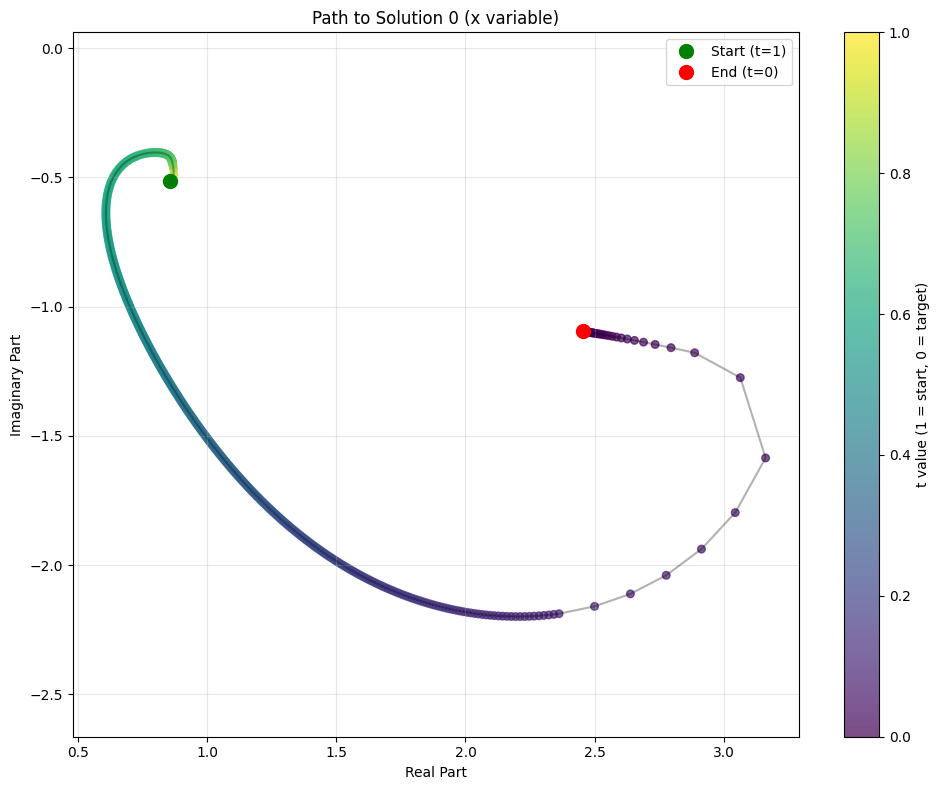

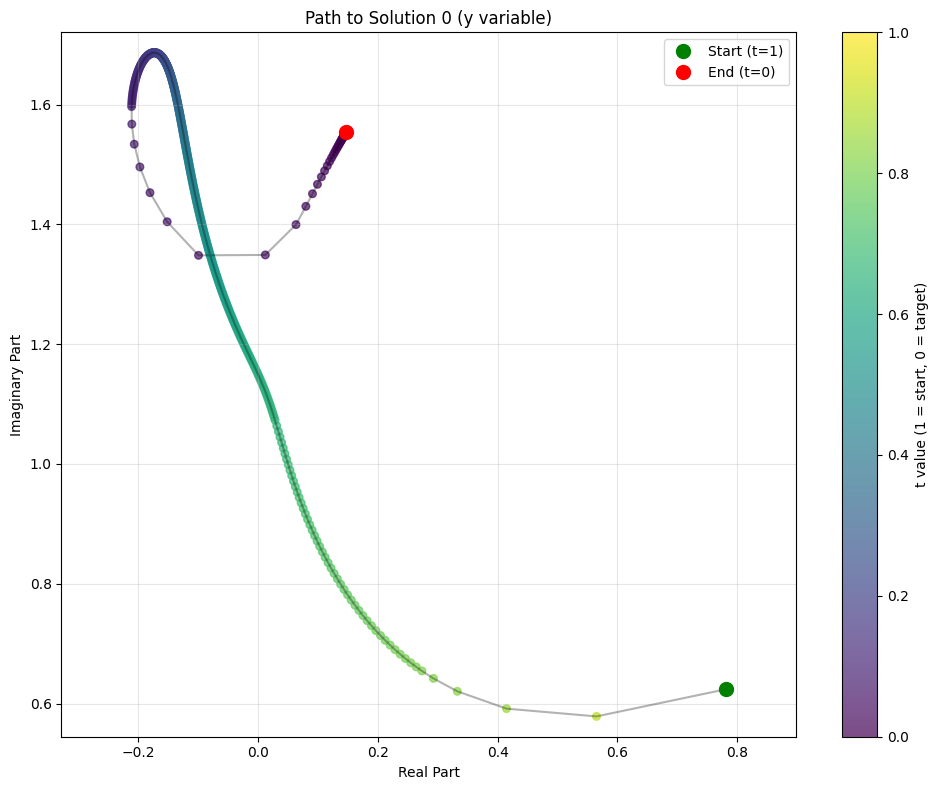


Real solutions:
SolutionSet: 1 solutions (1 real, 0 singular)
Tracked 6 paths, found 1 distinct solutions
Solve time: 2.66 seconds

Solution (regular, residual=5.57e-11):
  x = 0.20495761
  y = 4.83705


In [7]:
from pycontinuum import polyvar, PolynomialSystem, solve
import numpy as np
import matplotlib.pyplot as plt

# Create a simple polynomial system
x, y = polyvar('x', 'y')

# Simple system with a few solutions
equation1 = x**2 + y**2 - 1  # Circle
equation2 = y - x**2      # Parabola

system = PolynomialSystem([equation1, equation2])
print("System to solve:")
print(system)

# Solve the system with path tracking
solutions = solve(system, store_paths=True)

# Visualize solution paths using the library's built-in visualization
if solutions[0].path_points:
    from pycontinuum.visualization import plot_path
    
    # Plot path for the first solution (x variable)
    fig1 = plot_path(solutions[0].path_points, var_idx=0, 
                    title="Path to Solution 0 (x variable)")
    plt.show()
    
    # Plot path for the first solution (y variable)
    fig2 = plot_path(solutions[0].path_points, var_idx=1, 
                    title="Path to Solution 0 (y variable)")
    plt.show()

# Print real solutions
print("\nReal solutions:")
print(solutions.filter(real=True))